In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import scipy.stats as st

In [112]:
starbucks_df = pd.read_csv("stores.csv")

In [113]:
starbucks_df

,Id,StarbucksId,Name,BrandName,StoreNumber,PhoneNumber,OwnershipType,Street1,Street2,Street3,...,CountrySubdivisionCode,CountryCode,PostalCode,Longitude,Latitude,TimezoneOffset,TimezoneId,TimezoneOlsonId,FirstSeen,LastSeen
0,1f2d204f-e773-4361-9158-0008307dbd5e,10357,Target Virginia T-847,Starbucks,76666-97597,218-741-6603,LS,1001 13th St S,NaN,NaN,...,MN,US,557923254,-92.55,47.51,-360,Central Standard Time,GMT-06:00 America/Chicago,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
1,49455e22-49e9-461f-912c-00092386eaee,6557,PDX A 2,Starbucks,75916-104381,503-284-4008,LS,"7000 NE Airport Way, MB#3",NaN,NaN,...,OR,US,972181031,-122.59,45.59,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
2,1316ebf8-ee4a-479d-a11d-000964af367b,1010600,235 Bourke Street,Starbucks,25294-240419,NaN,LS,235-251 Bourke St,"Shops 5,6 & 10",NaN,...,VIC,AU,3000,144.97,-37.81,660,AUS Eastern Standard Time,GMT+10:00 Australia/Melbourne,10/8/2014 12:00:00 AM,2/3/2017 12:00:00 AM
3,1b8b9007-4587-4942-bf29-000a0af78161,1014921,Oasis Al-Kharj,Starbucks,27350-247327,NaN,LS,King Abdullah Rd,Al Khuzama,NaN,...,01,SA,NaN,47.27,24.13,180,Arab Standard Time,GMT+03:00 Asia/Riyadh,6/21/2016 12:00:00 AM,2/3/2017 12:00:00 AM
4,072752df-b30b-4f3f-a9b8-000ae32f8666,14667,Target Trumbull T-1956,Starbucks,76306-93245,203-455-0102,LS,120 Hawley Ln,NaN,NaN,...,CT,US,066115347,-73.15,41.23,-300,Eastern Standard Time,GMT-05:00 America/New_York,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,3d795b3d-5101-4bfa-8d4a-ffeac5ce30ad,1633,上海书城店,Starbucks,1396-140870,021-63914776,JV,黄浦区,东侧商铺,福州路465号2楼,...,31,CN,200001,121.48,31.23,480,China Standard Time,GMT+08:00 Asia/Beijing,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
25596,3ce8d70e-2eaf-4200-b6af-fff401167436,6300,Bei Xin,Starbucks,31003-102685,NaN,JV,"No. 27, Minquan Rd, Xindian Dist",1F,NaN,...,TPQ,TW,231,121.54,24.98,480,Taipei Standard Time,GMT+08:00 Asia/Taipei,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
25597,f86b90e4-5423-4b6d-835f-fff87e08721c,1012298,San Ramon Valley & Crow Canyon,Starbucks,25784-242224,925-421-5615,CO,2435 San Ramon Valley Blvd,Suite 7,NaN,...,CA,US,94583,-121.98,37.77,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,7/25/2015 12:00:00 AM,2/3/2017 12:00:00 AM
25598,62375258-a9f2-44fb-b98e-fff9c35670e7,1012848,Teavana - Hillcrest,Teavana,28652-250205,905-883-3832,CO,9350 Yonge St.,Unit H007B,Hillcrest,...,ON,CA,L4C 5G5,-79.43,43.85,-300,Eastern Standard Time,GMT-05:00 America/Toronto,7/11/2015 12:00:00 AM,2/3/2017 12:00:00 AM


In [118]:
us_stores = starbucks_df[starbucks_df['CountryCode'] == 'US']

In [119]:
us_stores

,Id,StarbucksId,Name,BrandName,StoreNumber,PhoneNumber,OwnershipType,Street1,Street2,Street3,...,CountrySubdivisionCode,CountryCode,PostalCode,Longitude,Latitude,TimezoneOffset,TimezoneId,TimezoneOlsonId,FirstSeen,LastSeen
0,1f2d204f-e773-4361-9158-0008307dbd5e,10357,Target Virginia T-847,Starbucks,76666-97597,218-741-6603,LS,1001 13th St S,NaN,NaN,...,MN,US,557923254,-92.55,47.51,-360,Central Standard Time,GMT-06:00 America/Chicago,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
1,49455e22-49e9-461f-912c-00092386eaee,6557,PDX A 2,Starbucks,75916-104381,503-284-4008,LS,"7000 NE Airport Way, MB#3",NaN,NaN,...,OR,US,972181031,-122.59,45.59,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
4,072752df-b30b-4f3f-a9b8-000ae32f8666,14667,Target Trumbull T-1956,Starbucks,76306-93245,203-455-0102,LS,120 Hawley Ln,NaN,NaN,...,CT,US,066115347,-73.15,41.23,-300,Eastern Standard Time,GMT-05:00 America/New_York,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
5,d387414f-827a-49b1-8002-000ced29086e,16329,Albertsons-Oceanside #6733,Starbucks,73636-67161,760-729-3468,LS,3450 Marron Rd,NaN,NaN,...,CA,US,920564672,-117.30,33.18,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
6,c247cc83-e908-4046-a9e1-000de0f73ea5,1015467,SEC Lincoln & Yosemite - Lone Tree,Starbucks,27851-193845,(720) 467-4703,CO,9998 Commons St.,NaN,NaN,...,CO,US,80124,-104.88,39.54,-420,Mountain Standard Time,GMT-07:00 America/Denver,8/16/2016 12:00:00 AM,2/3/2017 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25586,d2866db4-384a-4c39-b02e-ffcb6b1b917d,15223,Tacoma Mall,Starbucks,337-103,253-473-7727,CO,4502 South Steel Street,NaN,NaN,...,WA,US,984097242,-122.47,47.22,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
25588,cf315b86-69dd-4882-a099-ffd5d74b561f,15289,Princess Anne,Starbucks,7766-40481,757-471-6598,CO,2005 Lynnhaven Parkway,NaN,NaN,...,VA,US,234561410,-76.12,36.79,-300,Eastern Standard Time,GMT-05:00 America/New_York,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
25593,f79911f2-9f3f-49fb-8169-ffe2e30ee8b8,10656,Wright-Patterson AFB - Kittyhawk Ce,Starbucks,78093-117045,937-879-4617,LS,Oak St & Chestnut St,NaN,NaN,...,OH,US,45433541,-84.03,39.81,-300,Eastern Standard Time,GMT-05:00 America/New_York,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
25597,f86b90e4-5423-4b6d-835f-fff87e08721c,1012298,San Ramon Valley & Crow Canyon,Starbucks,25784-242224,925-421-5615,CO,2435 San Ramon Valley Blvd,Suite 7,NaN,...,CA,US,94583,-121.98,37.77,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,7/25/2015 12:00:00 AM,2/3/2017 12:00:00 AM


In [120]:
# us_stores = us_stores.rename(columns={'CountrySubdivisionCode':'State'}, inplace=True)

In [121]:
us_stores = us_stores[['Name', 'Street1', 'CountrySubdivisionCode', 'CountryCode', 'PostalCode', 'Longitude', 'Latitude']]

In [39]:
us_stores.reset_index(drop=True)

,Name,Street1,CountrySubdivisionCode,CountryCode,PostalCode,Longitude,Latitude
0,Target Virginia T-847,1001 13th St S,MN,US,557923254,-92.55,47.51
1,PDX A 2,"7000 NE Airport Way, MB#3",OR,US,972181031,-122.59,45.59
2,Target Trumbull T-1956,120 Hawley Ln,CT,US,066115347,-73.15,41.23
3,Albertsons-Oceanside #6733,3450 Marron Rd,CA,US,920564672,-117.30,33.18
4,SEC Lincoln & Yosemite - Lone Tree,9998 Commons St.,CO,US,80124,-104.88,39.54
...,...,...,...,...,...,...,...
13603,Tacoma Mall,4502 South Steel Street,WA,US,984097242,-122.47,47.22
13604,Princess Anne,2005 Lynnhaven Parkway,VA,US,234561410,-76.12,36.79
13605,Wright-Patterson AFB - Kittyhawk Ce,Oak St & Chestnut St,OH,US,45433541,-84.03,39.81
13606,San Ramon Valley & Crow Canyon,2435 San Ramon Valley Blvd,CA,US,94583,-121.98,37.77


In [122]:
us_stores['PostalCode'] = us_stores['PostalCode'].str[:5] 

<ipython-input-122-5f833ddd153c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_stores['PostalCode'] = us_stores['PostalCode'].str[:5]


In [123]:
us_stores

,Name,Street1,CountrySubdivisionCode,CountryCode,PostalCode,Longitude,Latitude
0,Target Virginia T-847,1001 13th St S,MN,US,55792,-92.55,47.51
1,PDX A 2,"7000 NE Airport Way, MB#3",OR,US,97218,-122.59,45.59
4,Target Trumbull T-1956,120 Hawley Ln,CT,US,06611,-73.15,41.23
5,Albertsons-Oceanside #6733,3450 Marron Rd,CA,US,92056,-117.30,33.18
6,SEC Lincoln & Yosemite - Lone Tree,9998 Commons St.,CO,US,80124,-104.88,39.54
...,...,...,...,...,...,...,...
25586,Tacoma Mall,4502 South Steel Street,WA,US,98409,-122.47,47.22
25588,Princess Anne,2005 Lynnhaven Parkway,VA,US,23456,-76.12,36.79
25593,Wright-Patterson AFB - Kittyhawk Ce,Oak St & Chestnut St,OH,US,45433,-84.03,39.81
25597,San Ramon Valley & Crow Canyon,2435 San Ramon Valley Blvd,CA,US,94583,-121.98,37.77


In [124]:
plot_us_stores = us_stores[['Longitude', 'Latitude']]

In [125]:
plot_us_stores

,Longitude,Latitude
0,-92.55,47.51
1,-122.59,45.59
4,-73.15,41.23
5,-117.30,33.18
6,-104.88,39.54
...,...,...
25586,-122.47,47.22
25588,-76.12,36.79
25593,-84.03,39.81
25597,-121.98,37.77


In [126]:
us_stores.to_csv('us_stores.csv')

In [127]:
plot_us_stores.to_csv('plot_us_stores.csv')

In [128]:
us_stores.to_json('us_stores.json')

In [129]:
us_stores

,Name,Street1,CountrySubdivisionCode,CountryCode,PostalCode,Longitude,Latitude
0,Target Virginia T-847,1001 13th St S,MN,US,55792,-92.55,47.51
1,PDX A 2,"7000 NE Airport Way, MB#3",OR,US,97218,-122.59,45.59
4,Target Trumbull T-1956,120 Hawley Ln,CT,US,06611,-73.15,41.23
5,Albertsons-Oceanside #6733,3450 Marron Rd,CA,US,92056,-117.30,33.18
6,SEC Lincoln & Yosemite - Lone Tree,9998 Commons St.,CO,US,80124,-104.88,39.54
...,...,...,...,...,...,...,...
25586,Tacoma Mall,4502 South Steel Street,WA,US,98409,-122.47,47.22
25588,Princess Anne,2005 Lynnhaven Parkway,VA,US,23456,-76.12,36.79
25593,Wright-Patterson AFB - Kittyhawk Ce,Oak St & Chestnut St,OH,US,45433,-84.03,39.81
25597,San Ramon Valley & Crow Canyon,2435 San Ramon Valley Blvd,CA,US,94583,-121.98,37.77


In [68]:
stores_by_state = us_stores.groupby(['CountrySubdivisionCode']).count()

In [86]:
stores_by_state.head(5)

,Name,Street1,CountryCode,PostalCode,Longitude,Latitude
CountrySubdivisionCode,,,,,,
AK,49,49,49,49,49,49
AL,85,85,85,85,85,85
AR,55,55,55,55,55,55
AZ,488,488,488,488,488,488
CA,2821,2821,2821,2821,2821,2821


In [154]:
most_per_state = stores_by_state.nlargest(10, ['Name'])
most_per_state

,Name,Street1,CountryCode,PostalCode,Longitude,Latitude
CountrySubdivisionCode,,,,,,
CA,2821,2821,2821,2821,2821,2821
TX,1042,1042,1042,1042,1042,1042
WA,757,757,757,757,757,757
FL,694,694,694,694,694,694
NY,645,645,645,645,645,645
IL,575,575,575,575,575,575
AZ,488,488,488,488,488,488
CO,481,481,481,481,481,481
VA,432,432,432,432,432,432


<AxesSubplot:xlabel='CountrySubdivisionCode'>

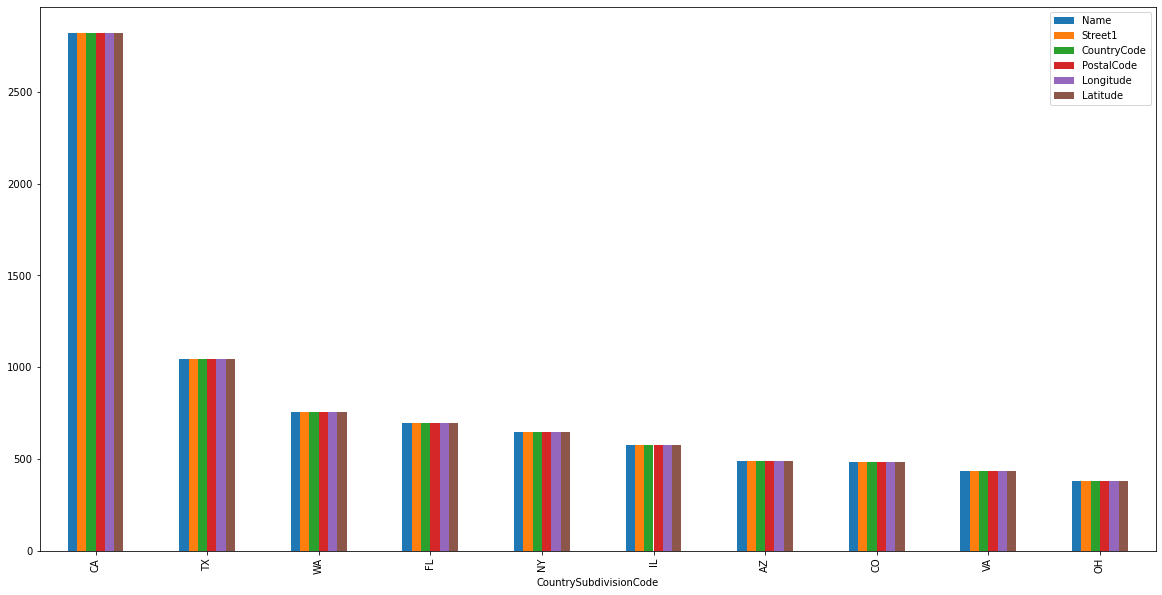

In [155]:
count_status = pd.value_counts(most_by_state['Name'].values, sort=True)
most_per_state.plot.bar(figsize=(20,10))